## kde TESS time series analysis
<pre>
version 1.1 2021/05/14
1.2 2021/11/04
1.3 2022/12/10
2.0 2023/04/27  with comments to share with Rupert Powell
2.1 2023/05/09  Argentina photometers
2.2 2023/05/09  problems in Góriz stars613
</pre>


In [1]:
import pandas as pd
import matplotlib.dates as mdates
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np

import os,sys,glob

In [2]:
# These are my choices for better looking plots
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Verdana']
plt.rcParams['font.size'] = 20.
plt.rcParams['lines.linewidth'] = 2.
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['grid.linewidth'] = 1.0
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['xtick.minor.size']=4
plt.rcParams['xtick.major.size']=8

In [4]:
# ********************************************
# This example for stars1 at Coslada, near Madrid airport
# ********************************************
directory = 'IDA_monthly_files/IDA/stars1/'
tessname  = 'stars1'
label     = "stars1 Coslada"
t_min1 , t_max1 = 14.0 , 19.0    # sky brightness limits, should be calculated TBD
size  = 4                      # size of points in scatter plot, shoud be calculated TDB


# ********************************************
# This example for stars35 in a dark location
# ********************************************
directory = 'IDA_monthly_files/IDA/stars35/'
tessname  = 'stars35'
label     = "stars35 Otlica Observatory (Slovenia)"
t_min1 , t_max1 = 15 , 22.5
size  = 4
# *************

# ********************************************
# This example for stars221 in CASLEO Argentina
# ********************************************
directory = 'IDA_monthly_files/IDA/stars221/'
tessname  = 'stars221'
label     = "stars221 CASLEO (Argentina)"
t_min1 , t_max1 = 15 , 22.5
size  = 4
# *************
# ********************************************
# This example for stars29 in Bahia Blanca Argentina
# ********************************************
directory = 'IDA_monthly_files/IDA/stars29/'
tessname  = 'stars29'
label     = "stars29 Bahía Blanca (Argentina)"
t_min1 , t_max1 = 15 , 22.5
size  = 4
# *************

# ********************************************
# This example for stars336 in refugio de Góriz
# ********************************************
directory = 'IDA_monthly_files/IDA/stars336/'
tessname  = 'stars336'
label     = "stars336 refugio de Góriz"
t_min1 , t_max1 = 15 , 22.5
size  = 4
# *************
# ********************************************
# This example for stars613 in refugio de Góriz
# ********************************************
directory = 'IDA_monthly_files/IDA/stars613/'
tessname  = 'stars613'
label     = "stars613 refugio de Góriz"
t_min1 , t_max1 = 15 , 22.5
size  = 4
# *************

# This example for stars642 in Sigüenza
# ********************************************
directory = 'IDA_monthly_files/IDA/stars641/'
tessname  = 'stars641'
label     = "stars641 Sigüenza"
t_min1 , t_max1 = 15 , 22.5
size  = 4
# *************


In [5]:
# Files obtained from a directory with IDA monthly files
walk_dir = '/Users/jzamorano/Google Drive/My Drive/0_TESS/DATOS_TESS/'+directory
print(walk_dir)

/Users/jzamorano/Google Drive/My Drive/0_TESS/DATOS_TESS/IDA_monthly_files/IDA/stars641/


In [6]:
# I am using date and sky brightness only in this notebook
# Use your code to retrieve all the parameters
fecha , tess  = [] , []
for root, dirs, files in os.walk(walk_dir):
 for name in sorted(files):
    if name.endswith(".dat"):
        datos_tess = open(walk_dir+name, 'r').readlines()
        print(walk_dir+name,len(datos_tess))
        datos_tess=[linea[:-1] for linea in datos_tess if linea[0]!="#"]
        #print(datos_tess)
        matriz = [datos_tess[caso].replace("\n","").split(';') for caso in range(len(datos_tess))]
        print(matriz[0])
        for fila in range(0,len(matriz),1):  
            #print(matriz[fila])
            #fecha_str = matriz[fila][1][0:-4]   # local time
            fecha_str = matriz[fila][0][0:-4]   # UT time
            # ZP = 20.26  # example, when bad ZP in TESS-W setup
            # flux = float(matriz[fila][4])
            # magni = ZP - 2.5 * np.log10(flux)
            magni = float(matriz[fila][5])
            if magni > 14 :
                fecha.append(datetime.datetime.strptime(fecha_str, '%Y-%m-%dT%H:%M:%S'))
                tess.append(magni)            


/Users/jzamorano/Google Drive/My Drive/0_TESS/DATOS_TESS/IDA_monthly_files/IDA/stars641/stars641_2021-06.dat 10781
['2021-06-19T16:07:24.000', '2021-06-19T16:07:24.000', '28.4', '14.5', '50000.000', '0.00', '20.32']
/Users/jzamorano/Google Drive/My Drive/0_TESS/DATOS_TESS/IDA_monthly_files/IDA/stars641/stars641_2021-07.dat 18403
['2021-07-01T00:00:25.000', '2021-07-01T00:00:25.000', '15.2', '-14.4', '1.240', '20.09', '20.32']
/Users/jzamorano/Google Drive/My Drive/0_TESS/DATOS_TESS/IDA_monthly_files/IDA/stars641/stars641_2021-08.dat 32863
['2021-08-01T00:00:44.000', '2021-08-01T00:00:44.000', '10.1', '-19.3', '1.240', '20.08', '20.32']
/Users/jzamorano/Google Drive/My Drive/0_TESS/DATOS_TESS/IDA_monthly_files/IDA/stars641/stars641_2021-09.dat 33354
['2021-09-01T00:00:45.000', '2021-09-01T00:00:45.000', '19.9', '10.2', '6.180', '18.34', '20.32']
/Users/jzamorano/Google Drive/My Drive/0_TESS/DATOS_TESS/IDA_monthly_files/IDA/stars641/stars641_2021-10.dat 10217
['2021-10-01T00:00:08.000', 

In [7]:
# datetime limits for available data
print(np.min(fecha))
print(np.max(fecha))

2021-06-19 22:44:31
2023-01-25 06:55:30


In [8]:
# Use the whole range of data for plots
xmin = np.min(fecha)
xmax = np.max(fecha)
# or select an interval
#xmin = datetime.datetime(2020,6,2,18,0,0)
#xmax = datetime.datetime(2020,6,3,8,0,0)

Text(0, 0.5, 'TESS-W sky brightness')

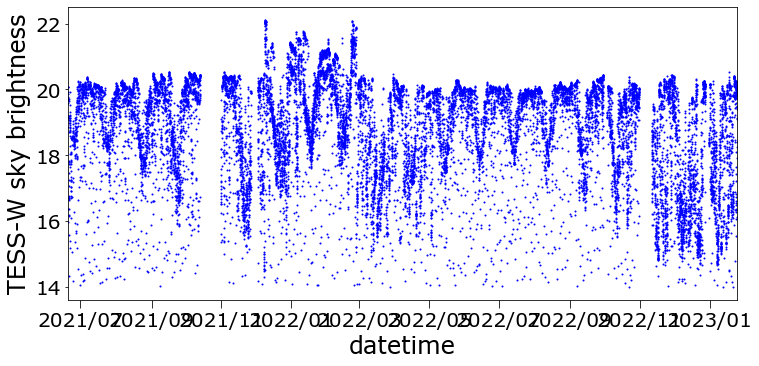

In [9]:
# First check to data (plot every 20 points)
date_form = mdates.DateFormatter("%Y/%m")
figura=plt.figure(figsize=(12,6))
plt.gcf().autofmt_xdate()
ax0=figura.add_subplot(111)
ax0.plot(fecha[::20],tess[::20],'bo',ms=1)
ax0.xaxis.set_major_formatter(date_form)
#ax0.set_ylim(16,22)
ax0.set_xlim(xmin,xmax)
plt.xlabel('datetime')
plt.ylabel('TESS-W sky brightness')

#### Creating the table with the data
<pre>
We are using Pandas in this notebook.
Astropy Table is another option. 
Astropy is useful to determine, Moon over horizon, for example.
I will share another notebook with this code.
</pre>

In [10]:
# You do not need this step is reading directly to pd dataframe
df = pd.DataFrame(list(zip(fecha, tess)),
               columns =['date', 'tess'])

In [11]:
df.head()

,date,tess
0,2021-06-19 22:44:31,15.99
1,2021-06-19 22:45:31,18.05
2,2021-06-19 22:46:31,18.24
3,2021-06-19 22:47:31,18.38
4,2021-06-19 22:48:31,18.23


In [12]:
# Date as index of dataframe
ddf = df.set_index('date')

In [13]:
ddf.head()

,tess
date,
2021-06-19 22:44:31,15.99
2021-06-19 22:45:31,18.05
2021-06-19 22:46:31,18.24
2021-06-19 22:47:31,18.38
2021-06-19 22:48:31,18.23


In [14]:
# Sometimes appear duplicate data in different files
# just in case check if duplicates with 
ddf.index.is_unique

True

In [15]:
# and solve if needed
df = ddf.loc[~ddf.index.duplicated(), :]

In [16]:
# Check again if duplicates with 
df.index.is_unique

True

In [17]:
# New column with time for graphs with time of the night around midnight
df['hour'] = df.index.hour + df.index.minute / 60 + df.index.second /3600

In [18]:
df.head()

,tess,hour
date,,
2021-06-19 22:44:31,15.99,22.741944
2021-06-19 22:45:31,18.05,22.758611
2021-06-19 22:46:31,18.24,22.775278
2021-06-19 22:47:31,18.38,22.791944
2021-06-19 22:48:31,18.23,22.808611


In [19]:
# time of the night around midnight
df.loc[df['hour'] > 12, 'hour'] = df['hour'] -24.

In [20]:
df.head()

,tess,hour
date,,
2021-06-19 22:44:31,15.99,-1.258056
2021-06-19 22:45:31,18.05,-1.241389
2021-06-19 22:46:31,18.24,-1.224722
2021-06-19 22:47:31,18.38,-1.208056
2021-06-19 22:48:31,18.23,-1.191389


In [21]:
df['datetime'] = df.index

#### Creating my custom made lookup table
<pre>
Using the same lookup table and limits for all photometers is useful to compare sky brightness in diferent locations.
We are using limits adapted to the available magnitude data for better visualization  
</pre>

In [22]:
# Creating my custom made lookup table
colors2 = plt.cm.viridis_r(np.linspace(0., 1, 192))
colors1 = plt.cm.YlOrRd_r(np.linspace(0, 1, 64))

colors3 = plt.cm.Greys_r(np.linspace(0., 1, 16))
colors2 = plt.cm.viridis_r(np.linspace(0., 1, 200))
colors1 = plt.cm.YlOrRd_r(np.linspace(0, 1, 40))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2 , colors3))
pink = np.array([248/256, 24/256, 148/256, 1])
colors[-16:, :] = pink
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

#### Creating US National Park Service lookup table
<pre>
This is the lookup table that use NPS 
https://www.nps.gov/articles/measuring-light-pollution-across-a-landscape.htm
</pre>

In [23]:
##  Color code NPS    
NPS_color= [(211,254,230),(210,254,234),(208,254,237),(206,254,240),(205,254,244),
	    (204,254,248),(201,254,251),(198,252,252),(195,250,253),(192,248,255),
	    (194,244,255),(196,240,254),(198,236,245),(200,232,254),(202,228,254),
	    (204,224,254),(206,220,254),(209,216,254),(210,210,252),(211,204,250),            

	    (211,196,248),(211,188,246),(211,180,244),(211,172,242),(212,162,238),
            (212,152,232),(212,142,224),(212,132,214),(213,122,202),(214,112,186),
            (216,102,170),(218, 92,154),(220, 82,138),(223, 72,122),(226, 62,106),
            (223, 52, 90),(220, 42, 74),(217, 32, 60),(214, 22, 54),(211, 18, 47),

            (208, 25, 43),(206, 25, 43),(204, 48, 41),(202, 60, 40),(200, 72, 39),
            (205, 88, 38),(210,102, 37),(216,116, 36),(222,130, 35),(228,145, 34),
            (233,160, 33),(238,173, 32),(243,186, 31),(248,200, 30),(247,210, 30),
            (243,208, 30),(239,200, 30),(228,194, 30),(208,192, 31),(188,190, 32),

            (168,189, 34),(148,187, 36),(128,185, 39),(108,185, 42),( 88,186, 45),
            ( 76,188, 54),( 66,190, 64),( 58,192, 76),( 52,194, 90),( 48,196,106),
            ( 45,198,120),( 42,199,134),( 39,200,148),( 36,199,162),( 33,197,176),
            ( 30,193,188),( 27,188,200),( 24,178,209),( 21,166,214),( 18,154,218),

            ( 17,142,220),( 19,130,220),( 21,118,220),( 23,106,220),( 25, 94,220),
            ( 27, 82,218),( 29, 70,216),( 31, 58,214),( 33, 46,212),( 35, 36,210),
            ( 37, 28,207),( 42, 24,203),( 49, 22,199),( 56, 24,196),( 64, 26,194),            
            ( 72, 28,190),( 79, 30,185),( 86, 32,180),( 93, 34,174),( 99, 36,167),

            (101, 38,156),( 99, 40,148),( 97, 42,141),( 95, 44,133),( 93, 46,125),
            ( 91, 48,117),( 89, 50,109),( 87, 52,100),( 85, 50, 90),( 83, 48, 80),( 81, 46, 70)]

NPS_color = np.divide(NPS_color,255.)
cmaplist = [NPS_color[i] for i in range(111)]

# create the new map
cmap_NPS = cmap.from_list('Custom cmap', cmaplist, cmap.N)

### Sky brightness record plot
<pre> 
Shows the evolution along the time.
Each point represents a measure.
Y-axis is time of the night around midnight.
X-axis is datetime
Each vertical line represents a night and each point is a sky brightness data (color coded).
The fish shape is related to the length of the night that varies along the year.
For shorter time intervals the nights are not vertical as the x-axis is datetime.
For dark places it is posible to detect the nights with Moon over the horizon.
</pre>

In [24]:
# find best record plot limits of time around midnight
print(np.min(df['hour']),np.max(df['hour']))
hmin, hmax = np.min(df['hour'])-0.2 , np.max(df['hour'])+0.2      # with an extra padding

-9.954722222222223 7.262777777777778


(array([  905.,   942.,  1041.,  1312.,  1863.,  2483.,  3170.,  3593.,
         4027.,  3854.,  4111.,  5909.,  5621.,  6654.,  7008.,  7801.,
         8050.,  8378.,  9144.,  9519., 11413., 12603., 13174., 12463.,
        11473., 13013., 13712., 18905., 24806., 33580., 30224., 18449.,
         7173.,  2572.,  3007.,  3973.,  2941.,  2141.,   559.]),
 array([14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8, 16. ,
        16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4, 17.6, 17.8, 18. , 18.2,
        18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6, 19.8, 20. , 20.2, 20.4,
        20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8]),
 <a list of 39 Patch objects>)

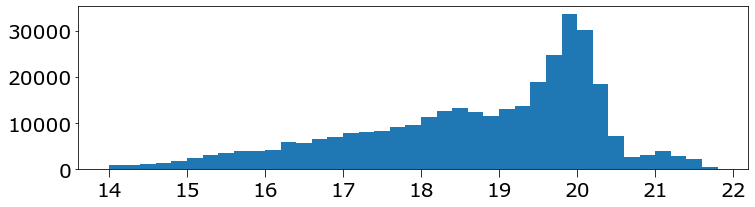

In [25]:
# find best tess magnitude limits
fig, ax = plt.subplots(figsize=(12, 3))
plt.hist(df['tess'], bins=np.arange(14,22,0.2))

In [26]:
# Min and max values of magnitude look uptable
# Using the same values is useful to compare among locations
print(t_min1,t_max1,hmin,hmax)
t_max1 = 22.
t_min1 = 17.

15 22.5 -10.154722222222222 7.462777777777778


In [27]:
# Min and max values of y-axis (time)
hmin = np.min(df['hour'])
hmax = np.max(df['hour'])
print(np.min(df['hour']),np.max(df['hour']))
hmin , hmax = -8 , 8

-9.954722222222223 7.262777777777778


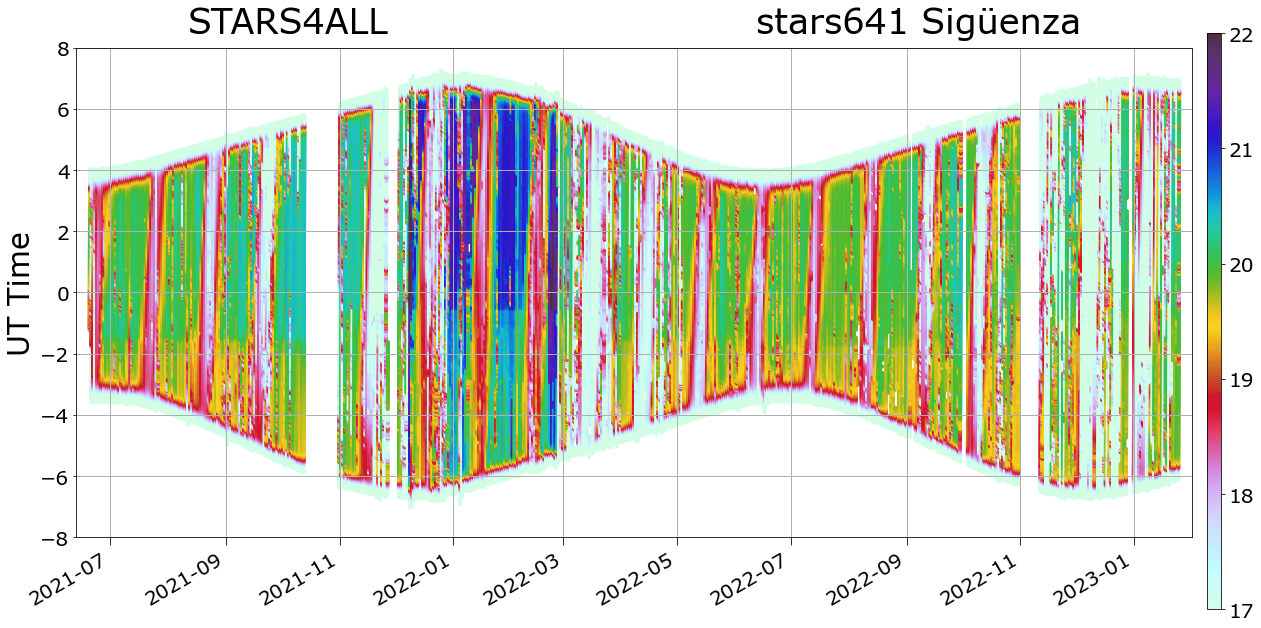

In [28]:
# The aspect of the graph could be changed but should be 'panoramic'
fig, ax = plt.subplots(figsize=(20, 10))

im = ax.scatter(df['datetime'], df['hour'], s=size+3, c=df["tess"], marker="o", cmap = cmap_NPS , vmin=t_min1, vmax=t_max1)
plt.text(0.10,1.05,'STARS4ALL',ha='left',va='center', transform=ax.transAxes, fontsize = 35)
plt.text(0.90,1.05,label,ha='right',va='center', transform=ax.transAxes, fontsize = 35)

#plt.ylabel('Local Time around midnight',fontsize = 30) # local time has problems with time saving.
plt.ylabel('UT Time',fontsize = 30)

# Plot limits
ax.set_xlim(np.min(df['datetime'])-datetime.timedelta(days=7),np.max(df['datetime'])+datetime.timedelta(days=7))
#ax.set_xlim(datetime.datetime(2021,1,1),np.max(df['datetime'])+datetime.timedelta(days=7))

ax.set_ylim(hmin,hmax)

fig.autofmt_xdate()
# Other datetime format options for shorter time intervals
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.grid()

cbaxes = fig.add_axes([0.91, 0.1, 0.01, 0.8])  
cb = plt.colorbar(im, cax = cbaxes)

# Saving record plot
out_file= tessname+'_record.png'
plt.savefig(out_file)

#### One night plot

In [83]:
df.head()

,tess,hour,datetime
date,,,
2021-06-19 22:44:31,15.99,-1.258056,2021-06-19 22:44:31
2021-06-19 22:45:31,18.05,-1.241389,2021-06-19 22:45:31
2021-06-19 22:46:31,18.24,-1.224722,2021-06-19 22:46:31
2021-06-19 22:47:31,18.38,-1.208056,2021-06-19 22:47:31
2021-06-19 22:48:31,18.23,-1.191389,2021-06-19 22:48:31


2022-01


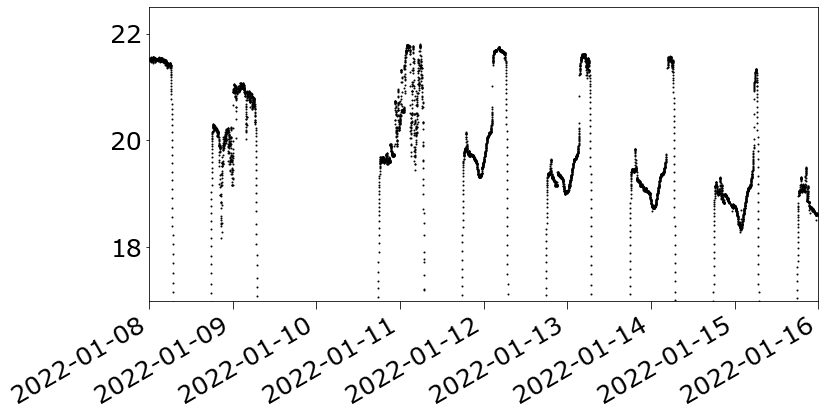

In [98]:
# Example of night graph for one month
nmonth = 7 # nth moth in list of months
print(mese[nmonth])
#figura=plt.figure(figsize=(12,6))
#y = df.loc[mese[nmonth], "tess"]
#x = df.loc[mese[nmonth], "hour"]
#plt.plot(x,y,'ko',ms=1)


# One single night in that month
figura=plt.figure(figsize=(12,6))
y = df.loc[mese[nmonth], "tess"]
x = df.loc[mese[nmonth], "datetime"]
plt.plot(x,y,'ko',ms=1)
plt.xlim(datetime.datetime(2022,1,8),datetime.datetime(2022,1,16))
plt.ylim(17,22.5)
plt.gcf().autofmt_xdate()



### Histogram 
<pre>
Shows a histogram for the complete set of sky brightness data.
The black line is the KDE (Kernel Density Estimation) 
https://en.wikipedia.org/wiki/Kernel_density_estimation
that estimates the real density distribution from a limited set of data.

We are using Pandas KDE plots. Scipy KDE could also be used, see below.
</pre>

In [29]:
#  Parameters to insert in the histogram plot
date_min = str(np.min(df['datetime']))[0:10]
date_max = str(np.max(df['datetime']))[0:10]
ndata = len(df['tess'])    # number of data points

In [30]:
# Minimum and maximum values of sky brightness for the histogram
min_bin , max_bin = t_min1 , t_max1
max_bin = 23
binsize = 0.1                   # This is a good choice
bins  = np.arange(min_bin,max_bin,binsize)

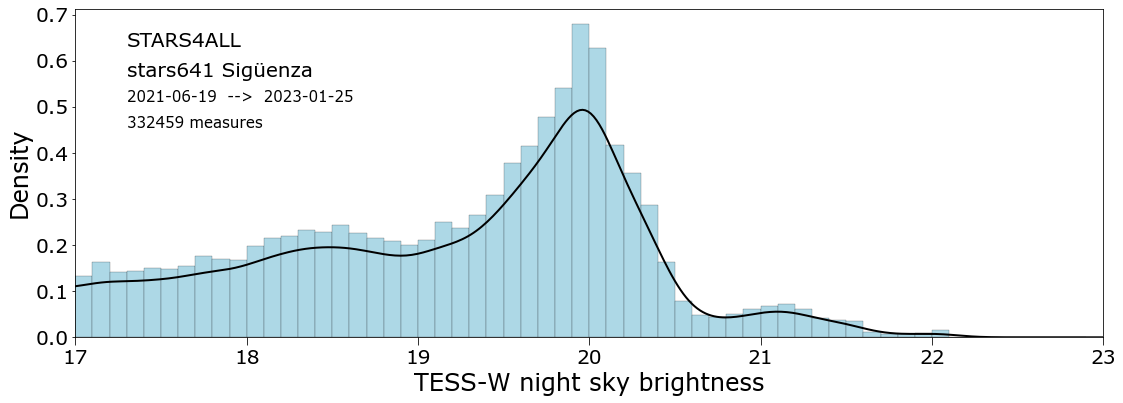

In [31]:
# The aspect of the graph could be changed but should be 'panoramic'
fig, ax = plt.subplots(figsize=(16, 6))

magnitude = df['tess']
ax = magnitude.plot(kind='kde',color='black',lw=2)
ax.hist(magnitude,bins=bins,density=True,histtype='bar',edgecolor='black', linewidth=0.2,color='lightblue')
ax.set_xlim(min_bin,max_bin)
ax.set_xlabel('TESS-W night sky brightness')
plt.text(0.05,0.90,'STARS4ALL',ha='left',va='center', transform=ax.transAxes, fontsize = 20)
plt.text(0.05,0.81,label,ha='left',va='center', transform=ax.transAxes, fontsize = 20)
plt.text(0.05,0.73,date_min+'  -->  '+date_max,ha='left',va='center', transform=ax.transAxes, fontsize = 15)
plt.text(0.05,0.65,str(ndata)+' measures',ha='left',va='center', transform=ax.transAxes, fontsize = 15)

# Saving to a file
out_file= tessname+'_histo.png'
plt.tight_layout()
plt.savefig(out_file)

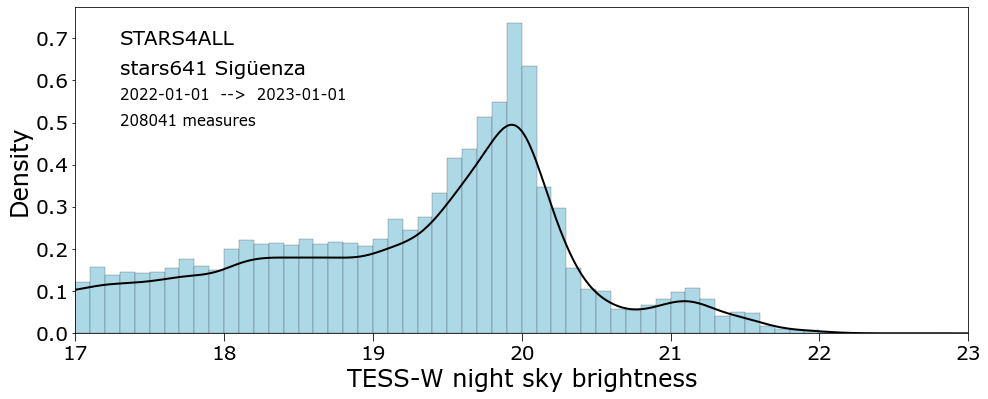

In [32]:
# Example for a shorter interval
# 
#fecha_min = str(np.min(df['datetime']))[0:10]
date_min = "2022-01-01"  #
date_max = "2023-01-01"  #"2021-01-01"
datemin = datetime.datetime.strptime(date_min,'%Y-%m-%d')
datemax = datetime.datetime.strptime(date_max,'%Y-%m-%d')
mask = (df['datetime'] > datemin) & (df['datetime'] < datemax)
magnitude = df['tess'][mask]
ndata = len(magnitude)

fig, ax = plt.subplots(figsize=(16, 6))
ax=magnitude.plot(kind='kde',color='black',lw=2)
ax.hist(magnitude,bins=bins,density=True,histtype='bar',edgecolor='black', linewidth=0.2,color='lightblue')
ax.set_xlim(min_bin,max_bin)
ax.set_xlabel('TESS-W night sky brightness')
plt.text(0.05,0.90,'STARS4ALL',ha='left',va='center', transform=ax.transAxes, fontsize = 20)
plt.text(0.05,0.81,label,ha='left',va='center', transform=ax.transAxes, fontsize = 20)
plt.text(0.05,0.73,date_min+'  -->  '+date_max,ha='left',va='center', transform=ax.transAxes, fontsize = 15)
plt.text(0.05,0.65,str(ndata)+' measures',ha='left',va='center', transform=ax.transAxes, fontsize = 15)
plt.show()

### Evolution along the time
<pre>
We are using Pandas KDE plots. Scipy KDE could also be used, see below.
</pre>

In [33]:
# List of moths in the selected time interval 
# in a year-month format

start_date = datetime.date(2020,1,1)          # this interval as example
end_date   = datetime.date(2023,12,31)

start_date = np.min(df['datetime'])
end_date   = np.max(df['datetime'])

year  = start_date.year
month = start_date.month
n=0
mese = []
mese_r = []
while (year, month) <= (end_date.year, end_date.month):
        mes = str(datetime.date(year, month,1))[0:7]
        mes_r = datetime.date(year, month,10)
        if month == 12:
            month = 1
            year += 1
        else:
            month += 1
        mese.append(mes)
        mese_r.append(mes_r)
        n += 1

In [34]:
# showing list of months
print(mese)

['2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01']


In [35]:
df.head()

,tess,hour,datetime
date,,,
2021-06-19 22:44:31,15.99,-1.258056,2021-06-19 22:44:31
2021-06-19 22:45:31,18.05,-1.241389,2021-06-19 22:45:31
2021-06-19 22:46:31,18.24,-1.224722,2021-06-19 22:46:31
2021-06-19 22:47:31,18.38,-1.208056,2021-06-19 22:47:31
2021-06-19 22:48:31,18.23,-1.191389,2021-06-19 22:48:31


In [36]:
# Selecting data for year 2021 as example
#df.loc["2021"]

2022-02
2022-02 20257  data points


Text(0.5, 0, 'TESS-W night sky brightness')

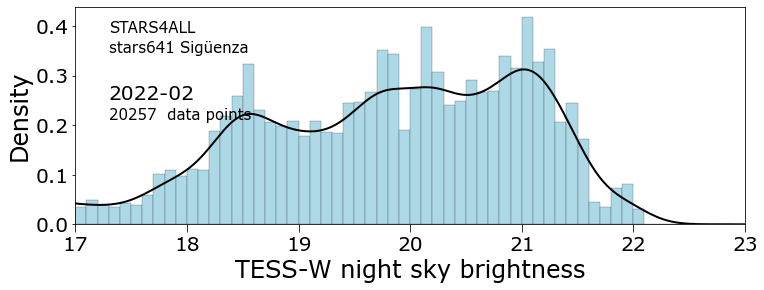

In [37]:
# Example of histogram + KDE for one month
# Warning: error if empty data for some month
nmonth = 8 # nth moth in list of months
print(mese[nmonth])
magnitude = df.loc[mese[nmonth], "tess"]
x = df.loc[mese[nmonth], "tess"].array

print(mese[nmonth],len(x),' data points')

fig, ax = plt.subplots(figsize=(12, 4))
ax = magnitude.plot(kind='kde',color='black',lw=2)

ax.hist(x,bins=bins, density = True,histtype='bar',edgecolor='black', linewidth=0.2,color='lightblue')
plt.text(0.05,0.90,'STARS4ALL',ha='left',va='center', transform=ax.transAxes, fontsize = 15)
plt.text(0.05,0.81,label,ha='left',va='center', transform=ax.transAxes, fontsize = 15)
plt.text(0.05,0.6,mese[nmonth], ha='left',va='center', transform=ax.transAxes, fontsize = 20)
plt.text(0.05,0.5,str(len(x))+ '  data points', ha='left',va='center', transform=ax.transAxes, fontsize = 15)

ax.set_xlim(min_bin,max_bin)
ax.set_xlabel('TESS-W night sky brightness')

Text(0.5, 0, 'TESS-W night sky brightness')

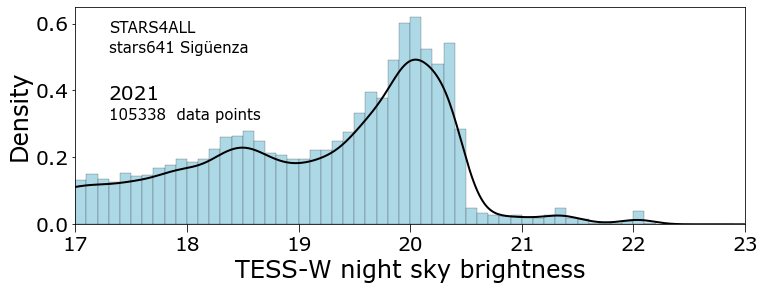

In [38]:
# # Example of histogram + KDE for one year
bins  = np.arange(min_bin,max_bin,.1)
magnitude = df.loc["2021"]["tess"]
#print(len(magnitude))
x = df.loc["2021"]["tess"].array
fig, ax = plt.subplots(figsize=(12, 4))
ax = magnitude.plot(kind='kde',color='black',lw=2)

ax.hist(x,bins=bins, density = True,histtype='bar',edgecolor='black', linewidth=0.2,color='lightblue')
plt.text(0.05,0.90,'STARS4ALL',ha='left',va='center', transform=ax.transAxes, fontsize = 15)
plt.text(0.05,0.81,label,ha='left',va='center', transform=ax.transAxes, fontsize = 15)
plt.text(0.05,0.6,'2021', ha='left',va='center', transform=ax.transAxes, fontsize = 20)
plt.text(0.05,0.5,str(len(x))+ '  data points', ha='left',va='center', transform=ax.transAxes, fontsize = 15)

ax.set_xlim(min_bin,max_bin)
ax.set_xlabel('TESS-W night sky brightness')

#### Using scipy stats gaussian KDE

In [39]:
# KDE de scipy stats
import scipy.stats
density = scipy.stats.gaussian_kde(magnitude)

101 0.49230536269469555 20.045226130653266 0.49230536269469555


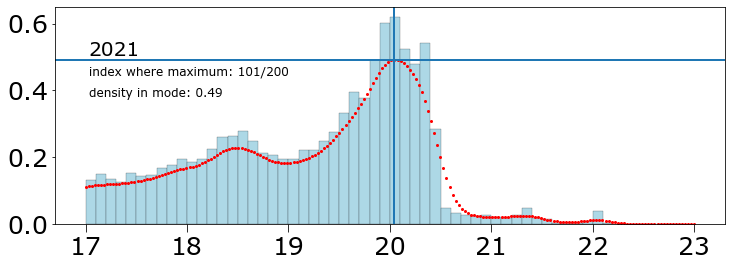

In [71]:
# Example of histogram + KDE for one year  with Scipy 

npoints = 200
x = np.linspace(min_bin , max_bin , npoints)    # calculating KDE npoints
y = density(x)

magnitude = df.loc["2021"]["tess"]

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x,y,'ro',ms=2)
ax.hist(magnitude,bins=bins, histtype='bar',edgecolor='black', linewidth=0.2,density = True,color='lightblue')
max_index = np.argmax(y)
max_value = round(np.max(y),2)
print(max_index,np.max(y),x[max_index],y[max_index])
ax.text(0.05,0.8,'2021', ha='left',va='center', transform=ax.transAxes, fontsize = 20)
ax.text(0.05,0.7,'index where maximum: '+str(max_index)+'/'+str(npoints), ha='left',va='center', transform=ax.transAxes, fontsize = 12)
ax.text(0.05,0.6,'density in mode: '+str(max_value), ha='left',va='center', transform=ax.transAxes, fontsize = 12)
plt.axhline(max_value)
plt.axvline(x[max_index])

In [41]:
# Finding local peaks
from scipy.signal import argrelextrema
xx = argrelextrema(y, np.greater)
print(xx)
print(x[xx[0]]) #,x[163])

(array([ 50, 101, 143, 167]),)
[18.50753769 20.04522613 21.31155779 22.03517588]


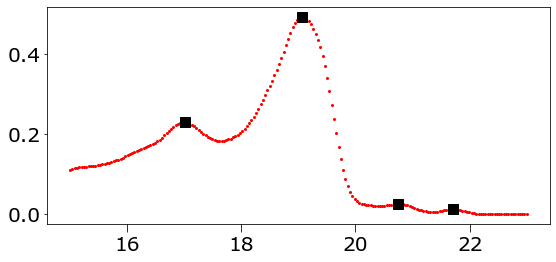

In [42]:
x = np.linspace(15,23,200)
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(x,y,'ro',ms=2)
plt.plot(x[xx],y[xx],'ks',ms=10)

In [43]:
def histo_kde_2ndmode(dataframe, label, xmin, xmax, x_width, display=False, maximum = 1):
    # KDE distribution 
    # Plot histogram and overplot kde
    # Extract last maximum (clear skies) and width (50%, other values as choice)
    # find second mode
    # data = df
    # xmin , xmax are plot limits
    # label for plot
    
    bins = np.arange(xmin,xmax,x_width)
    d = dataframe.array
    density = scipy.stats.gaussian_kde(dataframe.array)
    x = np.linspace(xmin,xmax,1000)
    y = density(x)
    xx = argrelextrema(y, np.greater)   # searcking for maxima
    #print(xx)
    pos = xx[-1]   # last maximum (default)
    posix = pos[-1]
    if maximum == 0:
        pos   = xx[0]   # first maximum
        posix = pos[0]
    print(pos,posix)
    mag_max     = round(x[pos][-1],2)
    density_max = round(y[pos][-1],2)
    if maximum == 0:
        mag_max     = round(x[pos][0],2)
        density_max = round(y[pos][0],2)
        
    density_50 = density_max * 0.5 #0.5
    #print(density_50)
    for j in range(-150,0):
        posi = posix + j
        if y[posi] > density_50:
            print("50%",posi,x[posi])
            pos_1 = posi
            break
    for j in range(0,150):
        posi = posix + j
        if y[posi] < density_50:
            print("50%",posi,x[posi])
            pos_2 = posi
            break
    #print(mag_max,density_max,density_50,x[posi],pos_1,pos_2)
    
    mag_1 = round(x[pos_1],2)
    mag_2 = round(x[pos_2],2)
    #print(mag_1, mag_max, mag_2)
    if display == "True":
        ax = dataframe.plot(kind='kde',color='red')
        ax.hist(d,bins=bins, density = True, color ="Lightblue")
        #ax.plot(x,y,'ro',ms=2)
        ax.text(0.05,0.9,label, ha='left',va='center', transform=ax.transAxes, fontsize = 10)
    
        for m in range(len(xx)):
            pos = xx[m]
            plt.plot(x[pos],y[pos],'ko',ms=12)
            plt.plot(x[pos],y[pos],'wo',ms=5)
            plt.grid()
            ax.set_xlim(xmin,xmax)
        plt.plot((x[0],x[-1]),((y[pos_1]+y[pos_2])/2,(y[pos_1]+y[pos_2])/2),'k--')
        plt.plot((x[pos_1],x[pos_2]),((y[pos_1]+y[pos_2])/2,(y[pos_1]+y[pos_2])/2),'k-')
        plt.plot(x[pos_1],y[pos_1],'ro',ms=9)
        plt.plot(x[pos_2],y[pos_2],'ro',ms=9)
        plt.text(x[100],(y[pos_1]+y[pos_2])/2+0.02,'50%')
        plt.xlabel("Sky brightness")
    return mag_1,mag_max,mag_2

2022-01


(array([0.03005923, 0.03138538, 0.02475466, 0.03315357, 0.02873309,
        0.04376271, 0.07735832, 0.05348776, 0.07603218, 0.09813456,
        0.11979489, 0.11935284, 0.13305632, 0.16576784, 0.21925559,
        0.20157369, 0.20113164, 0.28335249, 0.24356821, 0.18831226,
        0.2807002 , 0.32313677, 0.23163292, 0.27893201, 0.21041464,
        0.20113164, 0.25506144, 0.25992397, 0.19361683, 0.27627973,
        0.32225267, 0.2267704 , 0.27406949, 0.28467863, 0.45884537,
        0.52515251, 0.22898064, 0.19273274, 0.22721245, 0.36866767,
        0.40624171, 0.55344355, 0.33728229, 0.14985412, 0.19096455,
        0.22279197, 0.08885156, 0.05835028, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18. ,
        18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. , 19.1,
        19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19

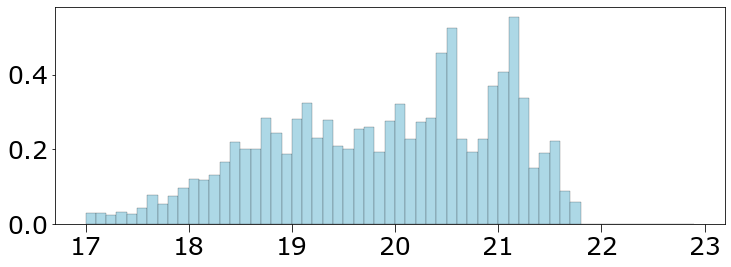

In [69]:
nmonth = 7
fig, ax = plt.subplots(figsize=(12, 4))
print(mese[nmonth])
magnitude = df.loc[mese[nmonth], "tess"] 
ax.hist(magnitude,bins=bins, histtype='bar',edgecolor='black', linewidth=0.2,density = True,color='lightblue')

2022-02
[261 523 669] 669
50% 519 20.117117117117118
50% 755 21.534534534534536
(20.12, 21.02, 21.53)


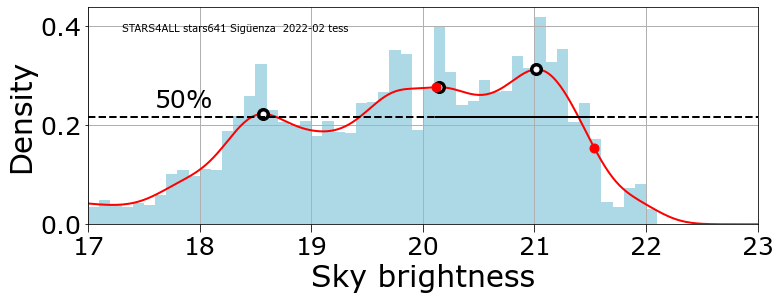

In [68]:
nmonth = 8
fig, ax = plt.subplots(figsize=(12, 4))
print(mese[nmonth])
magnitude = df.loc[mese[nmonth], "tess"] 
label_2= "STARS4ALL " + label  +"  "+str(mese[nmonth])+ " tess"
maximo = histo_kde_2ndmode(magnitude , label_2, min_bin , max_bin, 0.1, display="True")
print(maximo)

3 2021-09
4 2021-10
5 2021-11
6 2021-12
7 2022-01
8 2022-02
9 2022-03


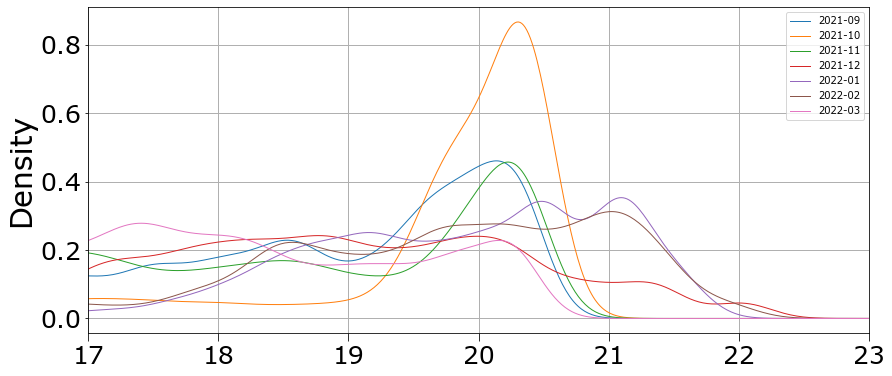

In [63]:
fig, axes = plt.subplots(1,1,figsize=(14, 6))
for i in range(3,10,1):  #)60,12):
    nmonth = i  #8+i
    print(nmonth,mese[nmonth])
    ax = axes
    #print(month)
    data = df.loc[mese[nmonth], "tess"] 
    data.plot(kind='kde',ax=ax,lw=1,label=str(mese[nmonth]),xlim=(min_bin , max_bin))
plt.legend(fontsize=10,ncol=1)
plt.grid()

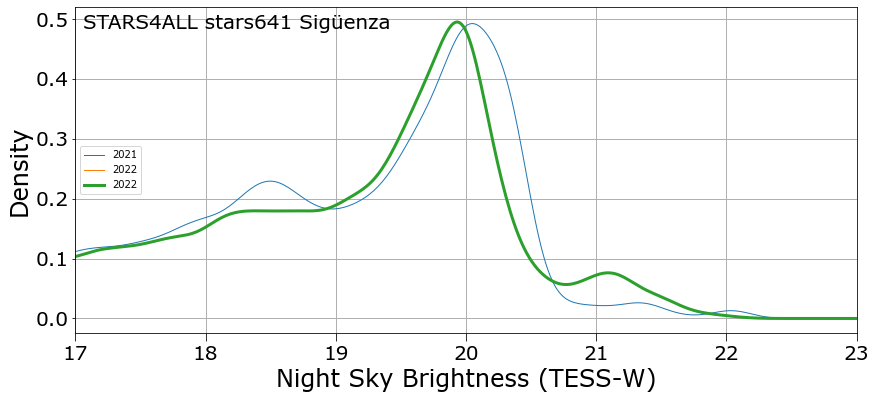

In [47]:
start_date = np.min(df['datetime'])
end_date   = np.max(df['datetime'])
year_ini  = start_date.year
year_end  = end_date.year

fig, axes = plt.subplots(1,1,figsize=(14, 6))
for i in range(year_ini,year_end,1):
    year = str(i)
    ax = axes
    data = df.loc[year, "tess"] 
    data.plot(kind='kde',ax=ax,lw=1,label=year,xlim=(min_bin , max_bin))
    
data = df.loc['2022', "tess"]
data.plot(kind='kde',ax=ax,label='2022',lw=3,xlim=(min_bin , max_bin))
label_2= 'STARS4ALL ' + label
ax.text(0.01,0.95,label_2, ha='left',va='center', transform=ax.transAxes, fontsize = 20)

plt.xlabel('Night Sky Brightness (TESS-W)')
plt.legend(fontsize=10,ncol=1,loc=6)
plt.grid()

In [48]:
# Example selecting december data 
# df['datetime'].dt.month == 12

### Sky brightness evolution

#### Yearly

2021
[249 508 720 838] 838
50% 688 21.13213213213213
50% 874 22.24924924924925
2021 (21.13, 22.03, 22.25)
2022


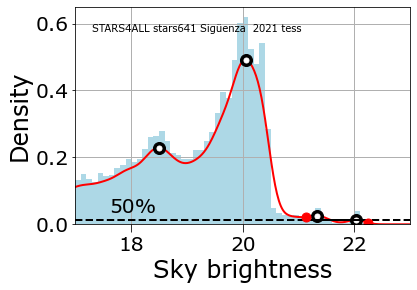

[230 278 488 681] 681
50% 531 20.18918918918919
50% 743 21.46246246246246
2022 (20.19, 21.09, 21.46)
[2021, 2022]


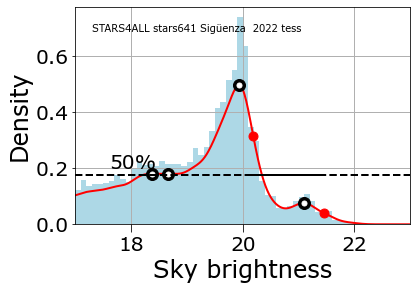

In [49]:
tess_up ,tess_mean,tess_down = [], [], []
anno = []
for i in range(year_ini,year_end,1):
    year = str(i)
    print(year)
    ax = axes
    data = df.loc[year, "tess"] 
    data.plot(kind='kde',ax=ax,lw=1,label=year,xlim=(min_bin,max_bin))
    #plt.hist(data)
    plt.show()
    label_2 = "STARS4ALL " + label  +"  "+year+ " tess"
    maximo  = histo_kde_2ndmode(data , label_2, min_bin,max_bin, 0.1, display="True")
    tess_down.append(maximo[0])
    tess_mean.append(maximo[1]) 
    tess_up.append(maximo[2]) 
    print(year,maximo)
    anno.append(int(year))
print(anno)

In [50]:
# Same as last cell but storing the results
tess_up ,tess_mean,tess_down = [], [], []
anno = []
for i in range(year_ini,year_end,1):
    year = str(i)
    print(year)
    ax = axes
    data = df.loc[year, "tess"] 
    data.plot(kind='kde',ax=ax,lw=1,label=year,xlim=(18,21.0))
    label_2= "STARS4ALL " + label  +"  "+year+ " tess"
    maximo = histo_kde_2ndmode(data , label_2, min_bin,max_bin, 0.1, display="False")
    tess_down.append(maximo[0])
    tess_mean.append(maximo[1]) 
    tess_up.append(maximo[2])    
    anno.append(int(year))
print(anno)

2021
[249 508 720 838] 838
50% 688 21.13213213213213
50% 874 22.24924924924925
2022
[230 278 488 681] 681
50% 531 20.18918918918919
50% 743 21.46246246246246
[2021, 2022]


In [51]:
# Datetime in the center of each year for plotting purposes
mydates = []
for i in range(len(anno)):
    mydates.append(datetime.datetime(anno[i],6,1))
print(mydates)

[datetime.datetime(2021, 6, 1, 0, 0), datetime.datetime(2022, 6, 1, 0, 0)]


20


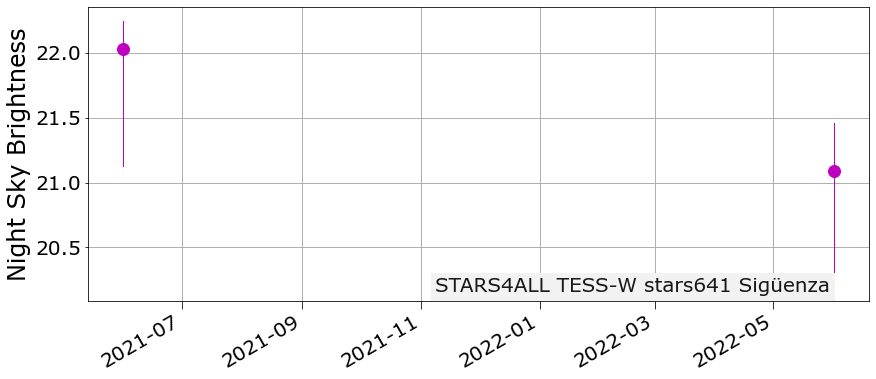

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
ax.text(0.95,0.05,'STARS4ALL TESS-W '+label , 
        ha='right',va='center', transform=ax.transAxes, fontsize = 20,
        backgroundcolor='0.95',alpha=.9)
ax.xaxis_date()
ax.plot(mydates,tess_mean,'mo',ms=12, label='tess stars9')
for i in range(len(anno)):
    ax.plot((mydates[i],mydates[i]),(tess_down[i],tess_up[i]),'m-',lw=1)
    
#ax.set_ylim(19.5,22.5)
plt.grid()
#ax.set_xlim(datetime.datetime(2016,9,1),datetime.datetime(2022,12,1))

#plt.legend(ncol=3,loc='upper left')
fig.autofmt_xdate()
plt.ylabel("Night Sky Brightness")
print(len(mese))

2021 2023 3
105338
208041
19080


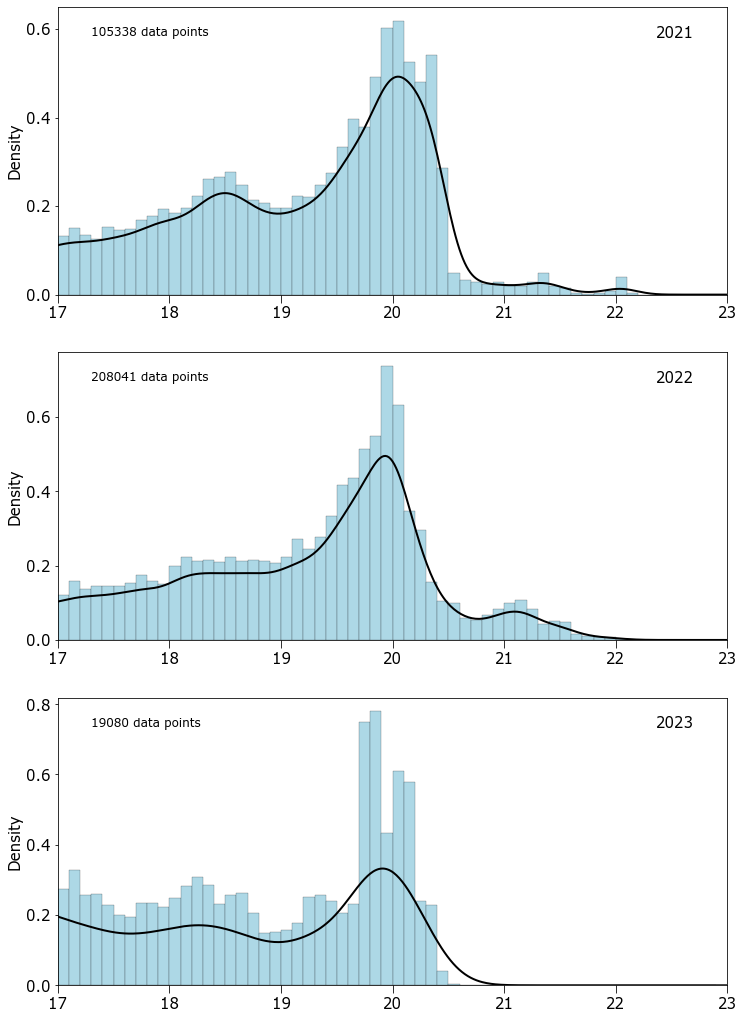

In [53]:
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['font.size'] = 15.
fig  = plt.figure(figsize=(12, 18))
bins  = np.arange(min_bin,max_bin,.1)
n_years = year_end - year_ini +1 
print(year_ini,year_end,n_years)
for i in range(0,n_years,1):
    year = str(year_ini+i)
    ax = plt.subplot(n_years,1, i+1)
    datos = df.loc[year]["tess"]
    print(len(datos))
    x = df.loc[year]["tess"].array
    ax = datos.plot(kind='kde',color='black',lw=2)
    ax.hist(x,bins=bins, density = True,histtype='bar',edgecolor='black', linewidth=0.2,color='lightblue')
    ax.text(0.95,0.91,year, ha='right',va='center', transform=ax.transAxes, fontsize = 15)
    ax.text(0.05,0.91,str(len(datos))+' data points',ha='left',va='center', transform=ax.transAxes, fontsize = 12)
    ax.set_xlim(min_bin,max_bin)
    
plt.rcParams['axes.labelsize'] = 'Large'
plt.rcParams['font.size'] = 25.

#### Monthly

8 2022-02 datos ---->  20257  data points


(array([ 67.,  93.,  72.,  65.,  82.,  75., 114., 192., 207., 186., 211.,
        208., 359., 413., 491., 613., 436., 391., 375., 397., 339., 396.,
        352., 350., 465., 470., 508., 668., 654., 363., 517., 756., 585.,
        457., 471., 554., 507., 512., 643., 598., 793., 621., 670., 393.,
        466., 328.,  84.,  66., 139., 154.,  60.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.]),
 array([17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18. ,
        18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. , 19.1,
        19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1, 20.2,
        20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1, 21.2, 21.3,
        21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3, 22.4,
        22.5, 22.6, 22.7, 22.8, 22.9]),
 <a list of 59 Patch objects>)

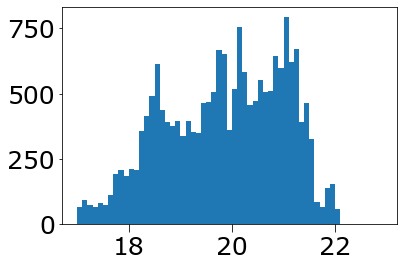

In [55]:
# Some months have low number of data points --> Not enough to statistics 
# Other month s have a weird histogram with multiple peaks and the main peak (mode)
# is not the last one. It is necessary to modify the code for finding the main peak.
# 
i = 8
data = df.loc[mese[i], "tess"]
print(i,mese[i],'datos ----> ',len(data),' data points')
plt.hist(data,bins=np.arange(min_bin,max_bin,0.1))
#maximo = histo_kde_2ndmode(data , label_2, min_bin,22.2, 0.1, display="True")

In [59]:
tess_up ,tess_mean,tess_down = [], [], []
mes = []
print(mese)
for i in range(0,len(mese)):
    data = df.loc[mese[i], "tess"]
    print(i,mese[i],'datos ----> ',len(data))
    if len(data)>1000:
        print('datos > 1000')
        data = df.loc[mese[i], "tess"]
        label_2 = "STARS4ALL" + mese[i] + "tess"
        maximo = histo_kde_2ndmode(data , label_2, min_bin,22.2, 0.2, display="False")
        tess_down.append(maximo[0])
        tess_mean.append(maximo[1]) 
        tess_up.append(maximo[2])    
        mes.append(mese[i])
print(mes)

['2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01']
0 2021-06 datos ---->  5095
datos > 1000
[ 38 302] 302
50% 218 18.134734734734735


UnboundLocalError: local variable 'pos_2' referenced before assignment

In [60]:
month_dates = []
for i in range(len(mes)):
    #print(i,mes[i])
    year  = int(mes[i][0:4])
    month = int(mes[i][-2:])
    month_dates.append(datetime.datetime(year,month,15))   # in the middle of the month for plotting purposes

20


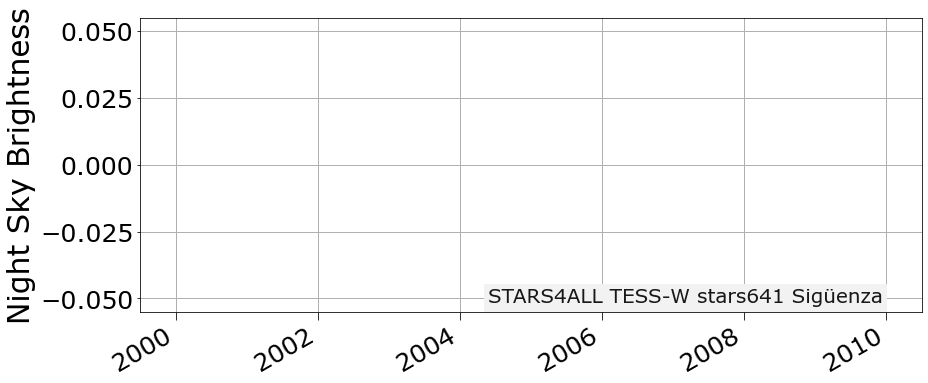

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
ax.text(0.95,0.05,'STARS4ALL TESS-W '+ label , 
        ha='right',va='center', transform=ax.transAxes, fontsize = 20,
        backgroundcolor='0.95',alpha=.9)
ax.xaxis_date()
ax.plot(month_dates,tess_mean,'mo',ms=12, label='tess' + tessname)
for i in range(len(mes)):
    ax.plot((month_dates[i],month_dates[i]),(tess_down[i],tess_up[i]),'m-',lw=1)
    
#ax.set_ylim(19.5,22.5)
#ax.set_xlim(datetime.datetime(2017,9,1),datetime.datetime(2023,4,30))
plt.grid()

fig.autofmt_xdate()
plt.ylabel("Night Sky Brightness")
print(len(mese))